In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
import pandas as pd

In [2]:
labels_path = "datasets/traffic_sign/labels.csv"
classes = pd.read_csv(labels_path)
class_names = list(classes['Name'])
num_classes = len(class_names)
data_dir = "datasets/traffic_sign/traffic_Data"

# Load the class labels
class_labels = pd.read_csv(labels_path)
class_names = list(class_labels['Name'])
num_classes = len(class_names)

# Data Preprocessing and Augmentation
batch_size = 32
image_size = (75, 75)  # Minimum input size required by InceptionV3

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    preprocessing_function=lambda x: tf.image.resize(x, image_size)
)

# Split the dataset into training and validation sets
train_datagen = datagen.flow_from_directory(
    data_dir+"/DATA",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_datagen = datagen.flow_from_directory(
    data_dir+"/TEST",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    # subset='validation' 
)

Found 4170 images belonging to 58 classes.
Found 2003 images belonging to 58 classes.


In [3]:
# Define the CNN architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 36, 36, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0

In [5]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Get the output of the convolutional and pooling layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D))]


1/1 [==============================] - 0s 337ms/step


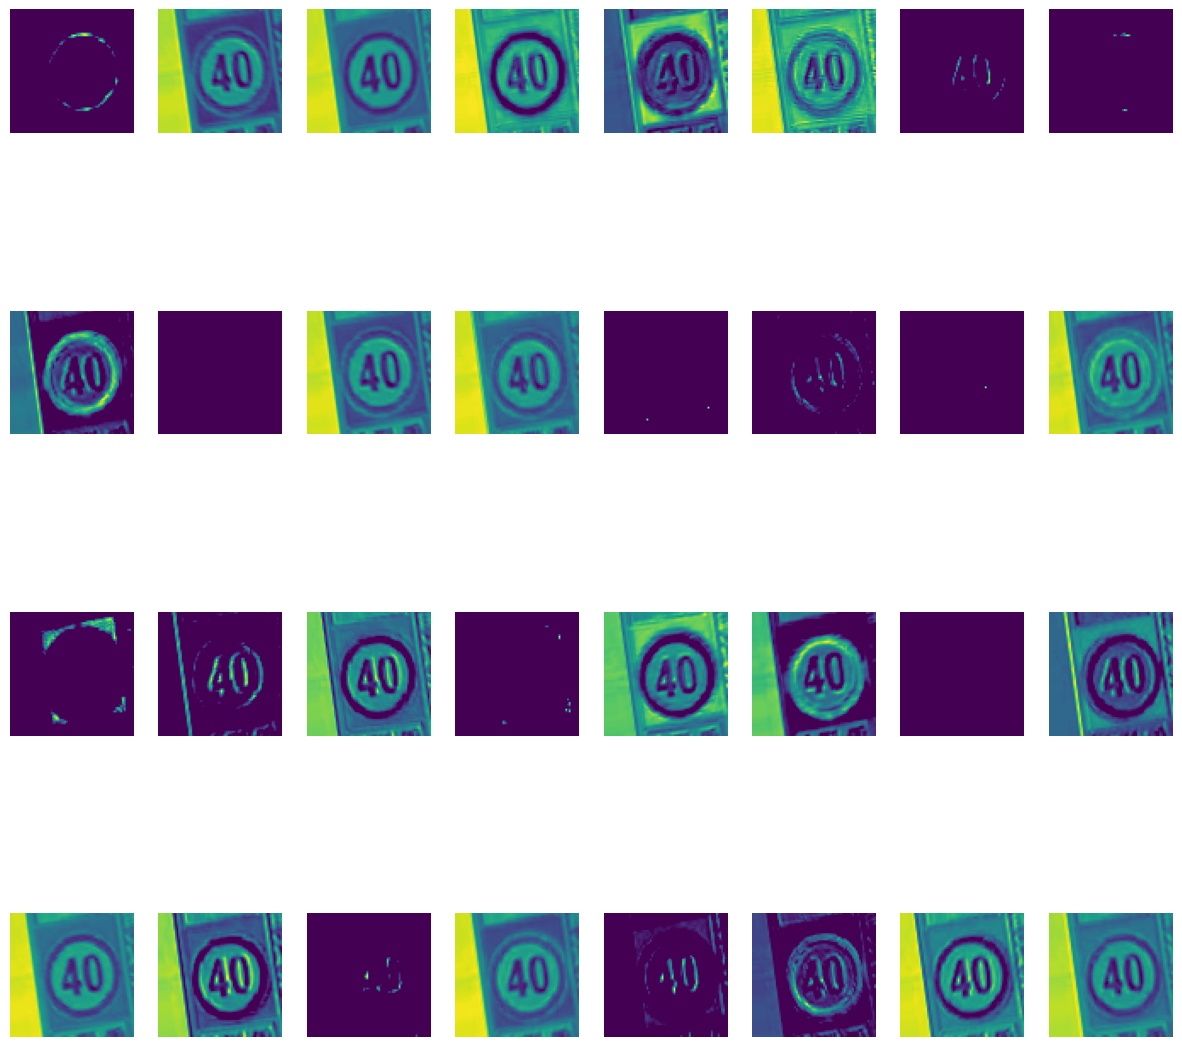

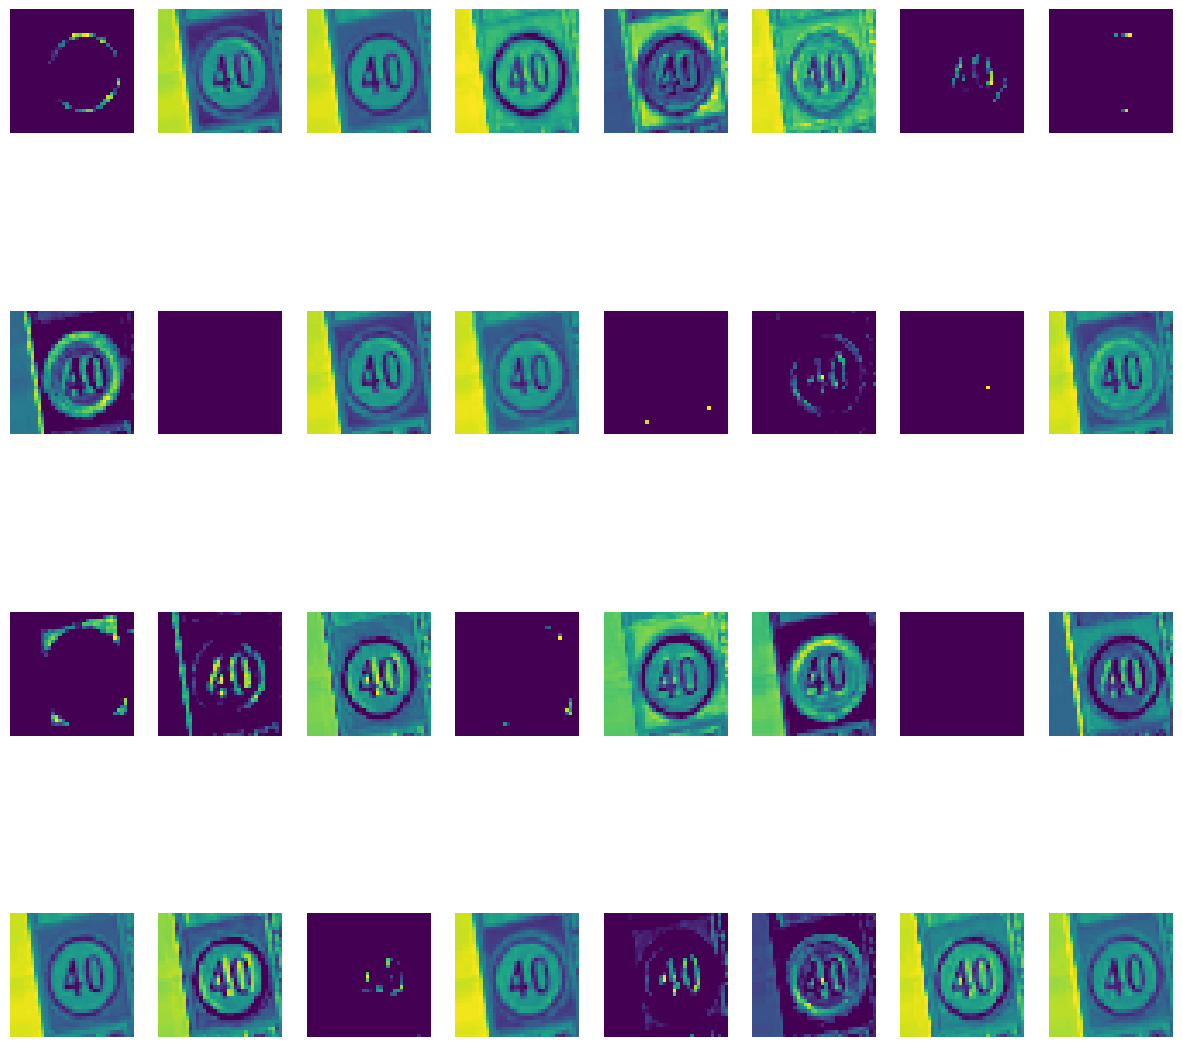

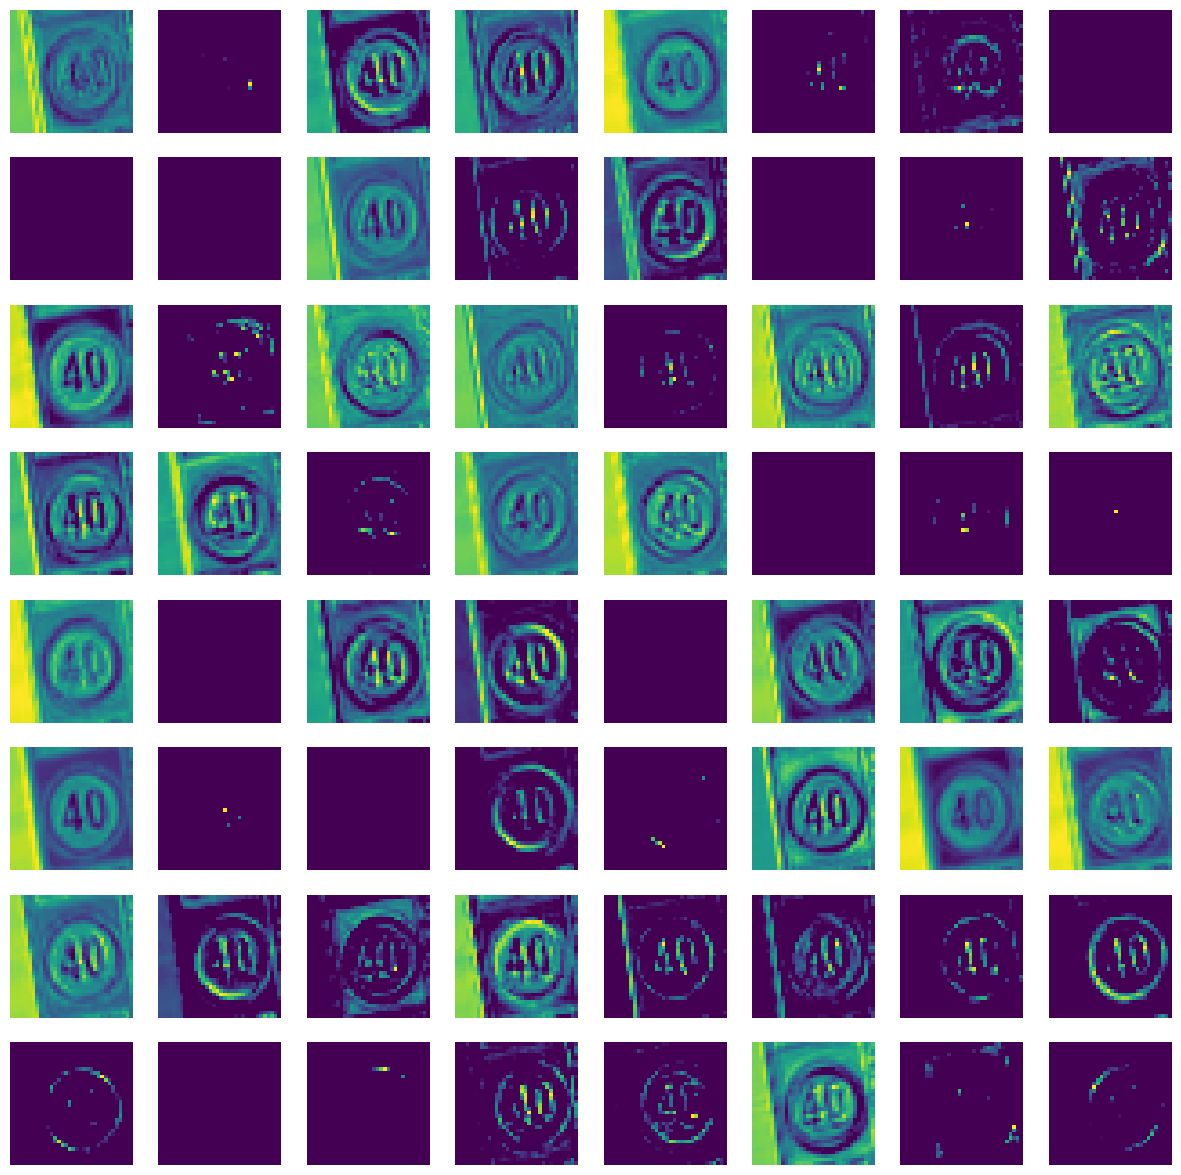

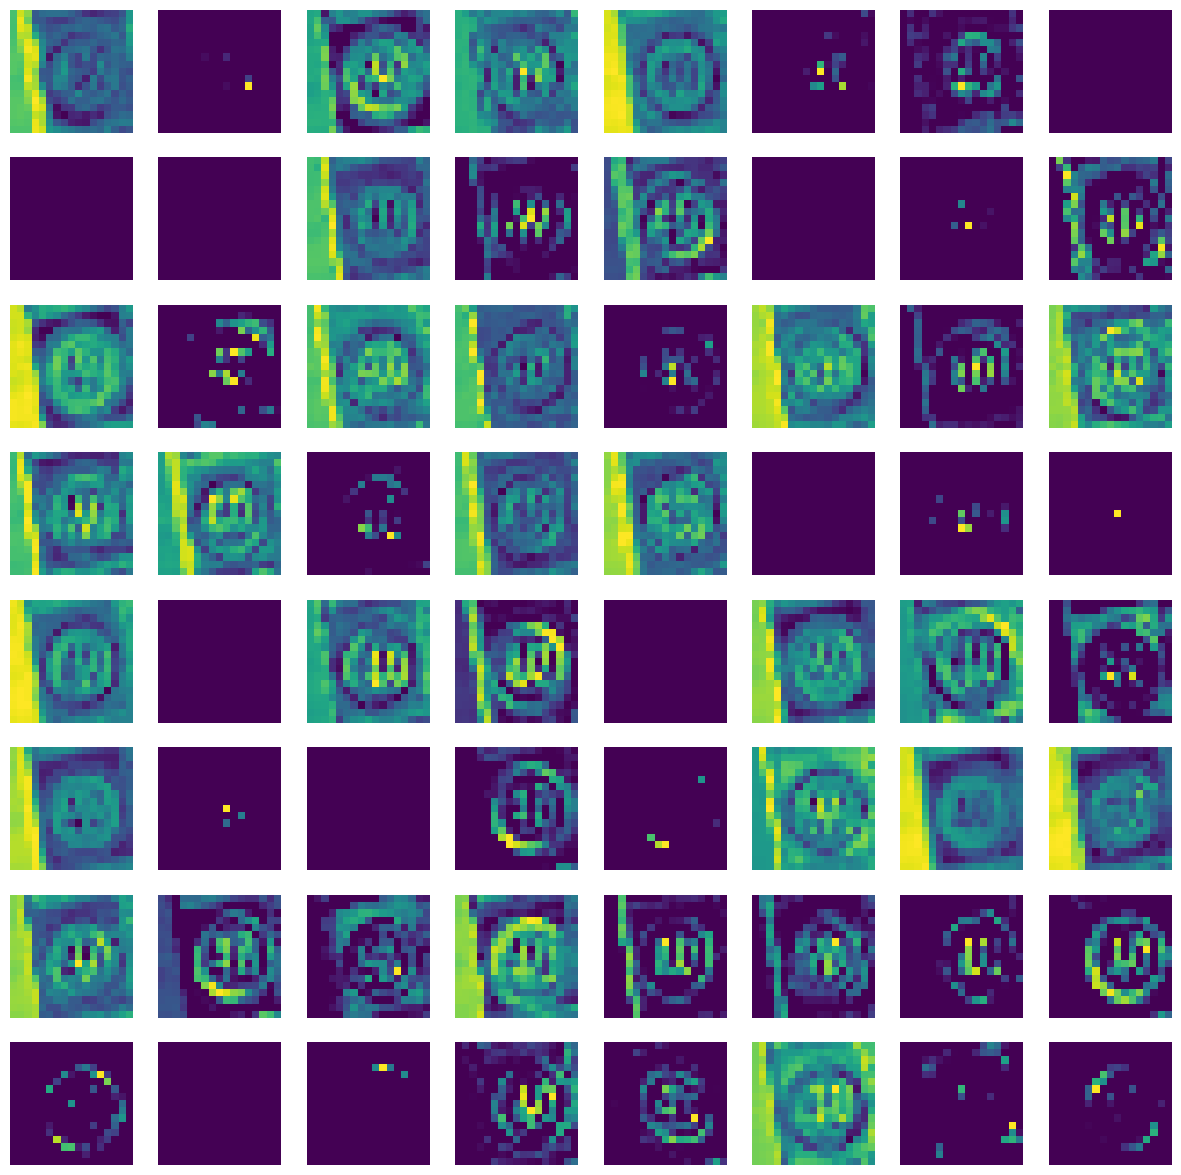

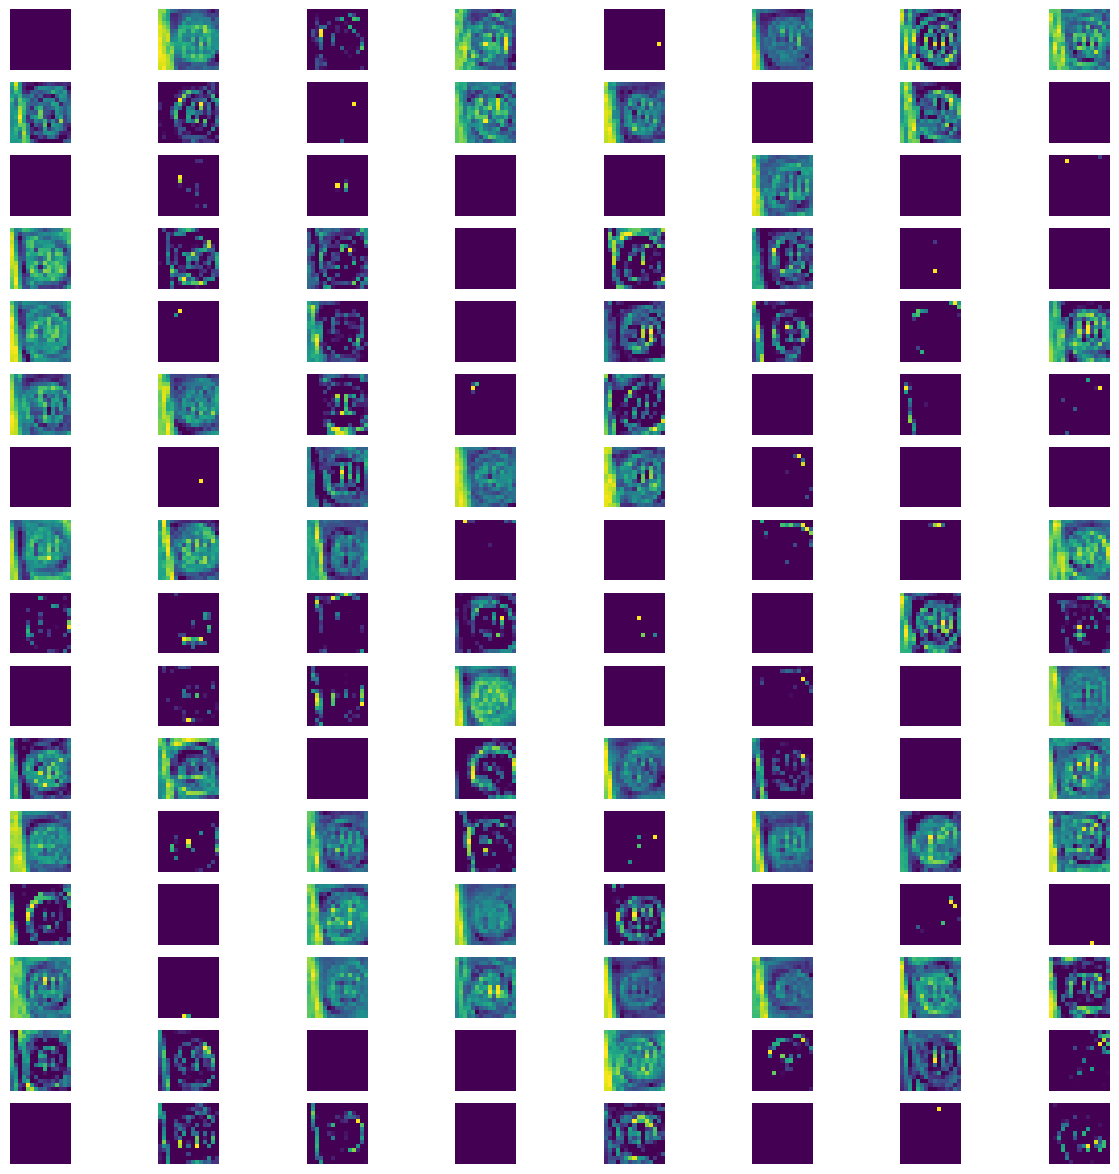

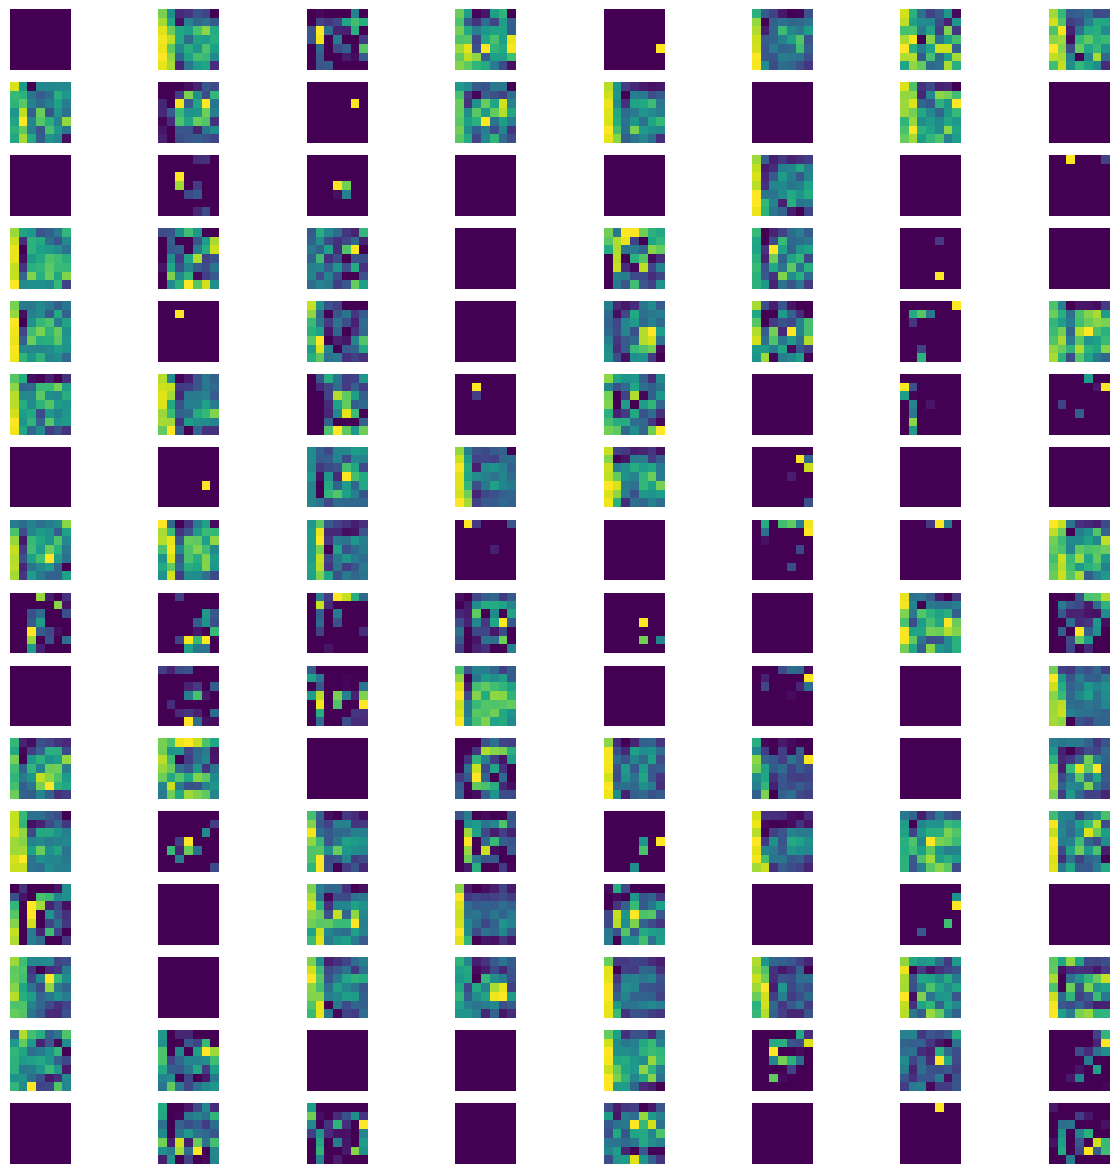

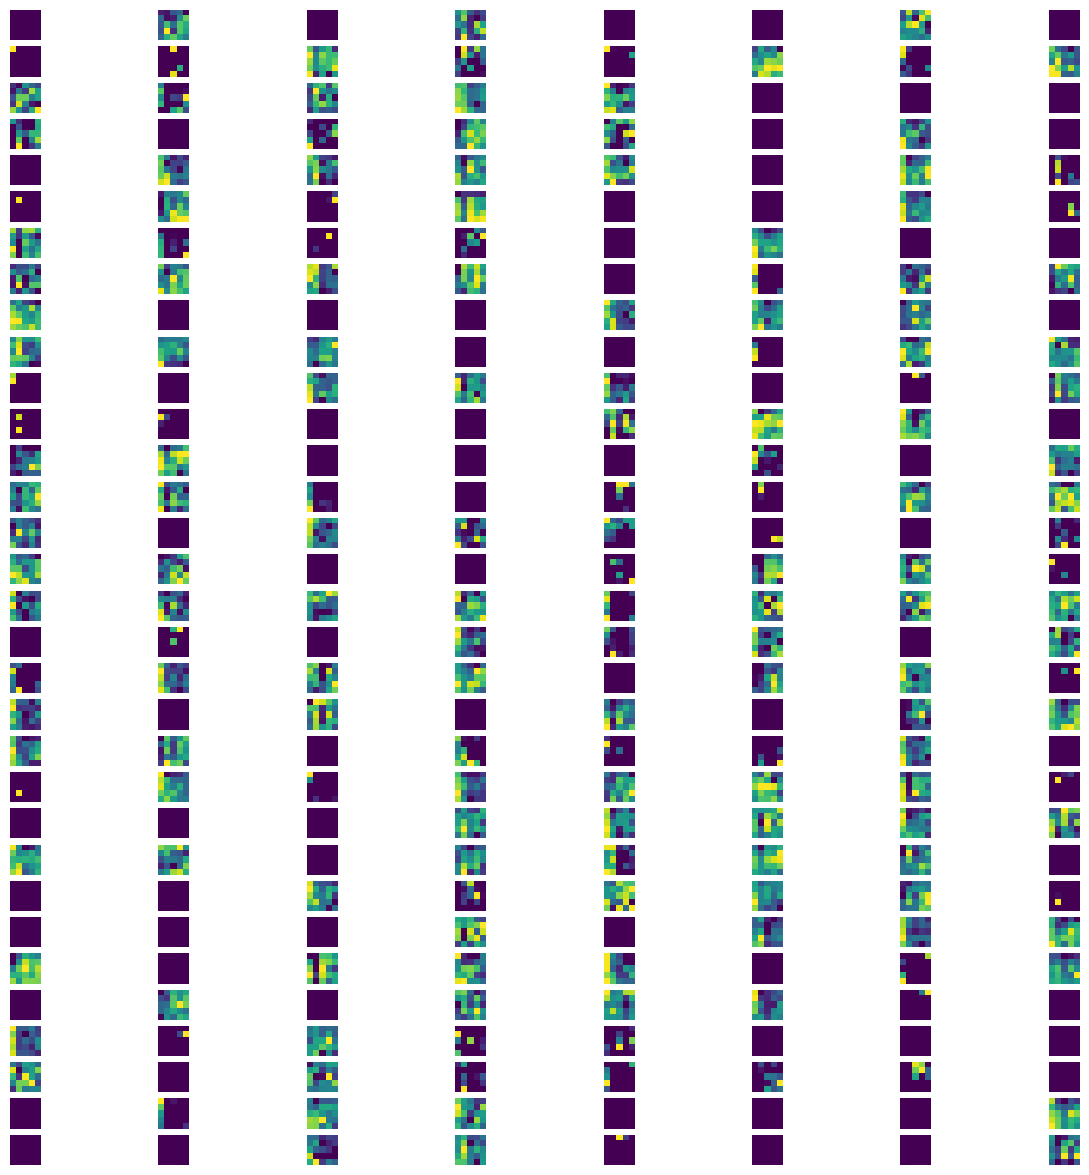

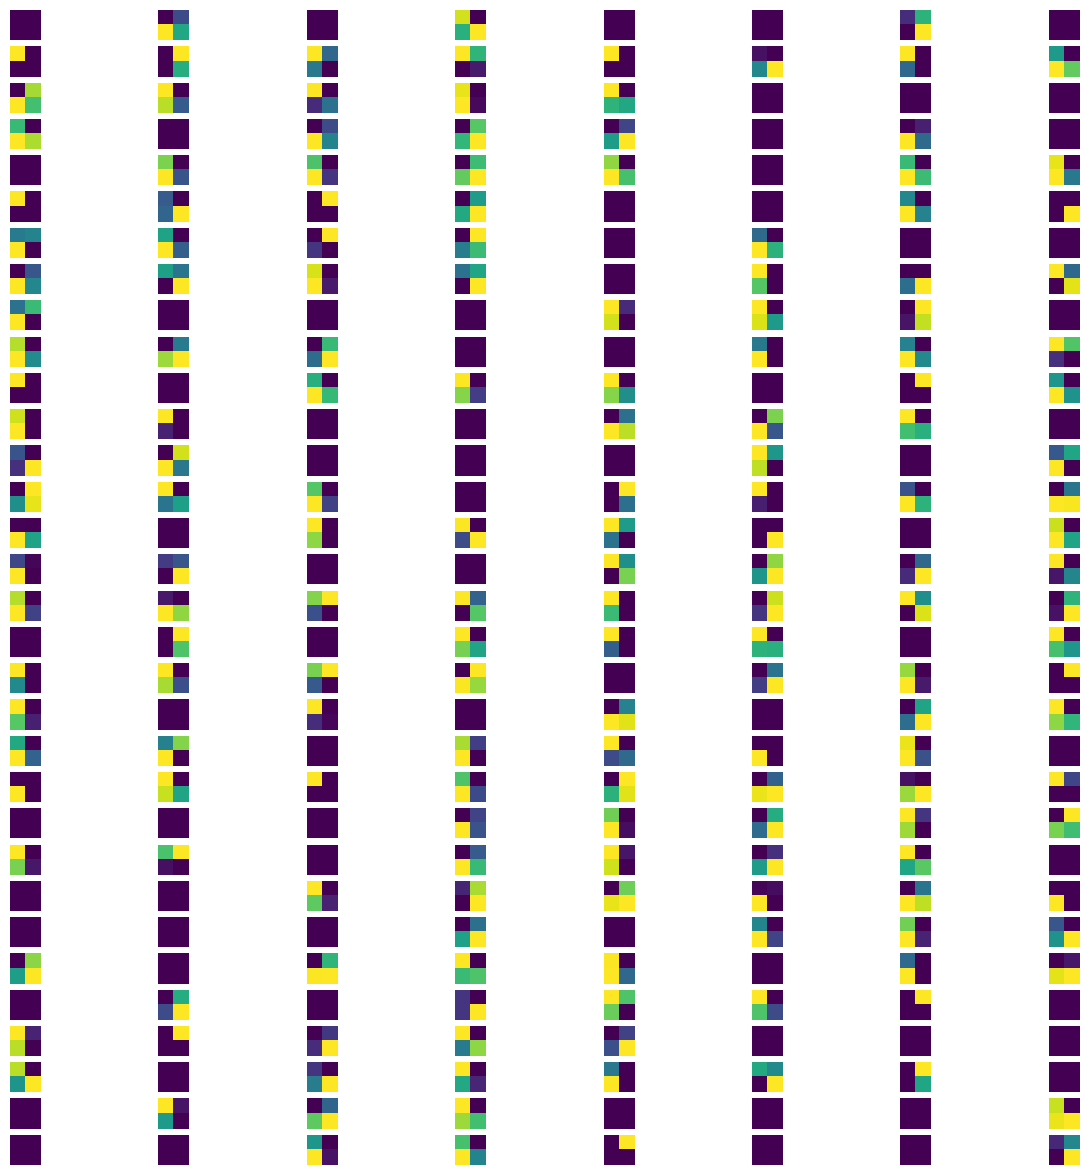

In [6]:
import matplotlib.pyplot as plt

# Get the output of the convolutional and pooling layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D))]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_datagen[0][0])

# Visualize the filters and pooling layers
for layer_activation in activations:
    num_filters = layer_activation.shape[-1]
    num_cols = 8
    num_rows = num_filters // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            ax.imshow(layer_activation[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()
